In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [73]:
class Random:
    
    """
    Joueur contrôle choisissant à chaque fois une lotterie au hasard
    """
    
    def __init__(self):
        self.gain = []
    
    #choix de la lotterie
    def play(self, index, lottery_1, lottery_2):
        return random.randint(0,1)
    
    #ajout du gain    
    def process(self, gain):
        self.gain.append(gain)
        
class Oracle:
    
    """
    Joueur jouant la meilleure lotterie à chaque tour
    """
    
    def __init__(self):
        self.gain = []
    
    #choix de la lotterie
    def play(self, index, lottery_1, lottery_2):
        prob_1, gain_1 = lottery_1
        prob_2, gain_2 = lottery_2
        if prob_1*gain_1 > prob_2*gain_2:
            return 0
        else:
            return 1
        
    #ajout du gain  
    def process(self, gain):
        self.gain.append(gain)
        
class Epsilon:
    
    """
    Joueur suivant la technique Epsilon Greedy
    """
    
    def __init__(self):
        self.gain = []
        self.gain1 = []
        self.gain2 = []
        
    #choix de la lotterie
    def play (self, index, lottery_1, lottery_2, epsilon):
        #premier choix au hasard
        if index == 0:
            return random.randint(0,1)
       
        elif random.uniform(0,1) <= epsilon:
            return random.randint(0,1)
        
        #choix de la meilleure lotterie à l'instant t
        else:
            if len(self.gain1) == 0:
                return 1
            
            elif len(self.gain2) == 0:
                return 0
            
            else:
                if np.mean(self.gain1) > np.mean(self.gain2):
                    return 0
                
                else:
                    return 1
            
    #ajout du gain  
    def process(self, gain, choice):
        self.gain.append(gain)
        if choice == 0:
            self.gain1.append(gain)
        else:
            self.gain2.append(gain)

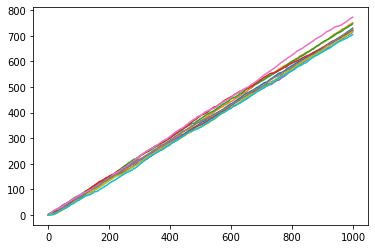

In [75]:
### Programme Principal

lotteries = [(0.75, 1), (0.25, 1)]

n_trial = 1000
n_player = 10

for j in range (n_player):
    
    player = Epsilon()
    
    for i in range(n_trial):
        choice = player.play(i, lotteries[0], lotteries[1], 0.05)
        prob, value = lotteries[choice]
        gain = 0
        if random.uniform(0,1) <= prob:
            gain = value
        
        player.process(gain, choice)
    
    #print(np.mean(player.gain), np.std(player.gain))
    #plt.plot(np.cumsum(player.gain))

#print(player.gain1)
#print(np.mean(player.gain2))
#print(np.mean(player.gain))
#print(player.play(lottery_1, lottery_2))